# Using a PreTrained openface model on Custom Datasets
  Model Used Uses Inception-Resnetv1 Architecture Trained on VGGFace2 Dataset and have 512D Embeddings

In [1]:
from keras.models import load_model
import os
import numpy as np
import glob

Using TensorFlow backend.


## InceptionResnetV1
Input-Size = 160
Output = 512D

In [2]:
facenet = load_model('./models/facenet_keras.h5')
#facenet.summary()

/home/admin/anaconda3/envs/rudra/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### Load Pretrained Weights on VGGFace2 Datasets with millions faces

In [6]:
facenet.load_weights('./models/facenet_keras_weights.h5')


### Prepare Dataset for training

In [3]:
def load_paths(dataset_path):
    return np.asarray([os.path.abspath(y) for x in os.walk(dataset_path) for y in glob.glob(os.path.join(x[0], "*.jpg"))])

In [4]:
train_paths = load_paths("/image/rudra/projects/FaceNet/data/train/")
train_paths

array(['/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0001.jpg',
       '/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0002.jpg',
       '/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0003.jpg',
       '/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0004.jpg',
       '/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0005.jpg',
       '/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0006.jpg',
       '/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0007.jpg',
       '/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0008.jpg',
       '/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0009.jpg',
       '/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0010.jpg',
       '/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0011.jpg',
       '/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0012.jpg',
       '/image/r

In [5]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from align import AlignDlib
%matplotlib inline

face_detector_file = "./models/shape_predictor_68_face_landmarks.dat"

def load_img(path):
    img = cv2.imread(path, 1)
    img = img[...,::-1]
    return img

def show_original_n_aligned(img_path, facedetector):
    plt.figure(figsize=(10,10))
    img = load_img(img_path)
    aligndlib = AlignDlib(face_detector_file)
    bounding_box = aligndlib.getLargestFaceBoundingBox(img)
    aligned_img = aligndlib.align(160, img, bounding_box, landmarkIndices=AlignDlib.INNER_EYES_AND_BOTTOM_LIP)
    plt.subplot(131)
    plt.imshow(img)
    plt.subplot(132)
    plt.imshow(img)
    plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill = False, color = "red"))
    plt.subplot(133)
    plt.imshow(aligned_img)
    

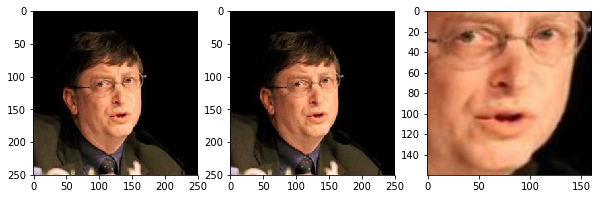

In [142]:
show_original_n_aligned(train_paths[100], face_detector_file)

In [3]:
aligndlib = AlignDlib(face_detector_file)
def align_image(img):
    return aligndlib.align(160, img, aligndlib.getLargestFaceBoundingBox(img), landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

## Generate Embedding Vectors

In [5]:
trainpaths = load_paths("/image/rudra/face_Recognition_local/data/train/gautam/")

## using MTCNN in images

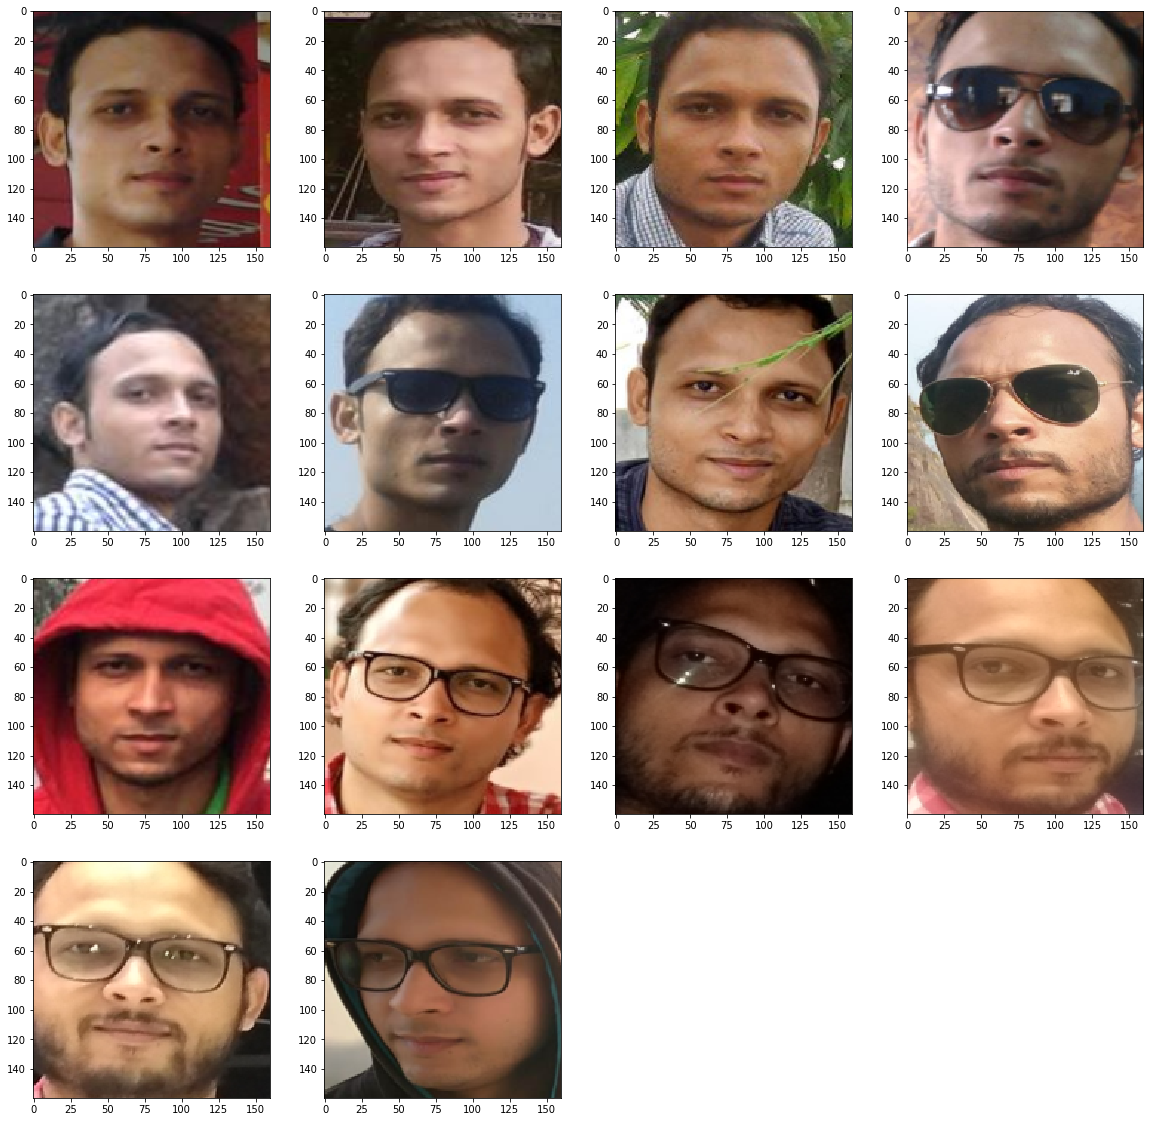

In [7]:
from align_mtcnn import AlignMTCNN
align_image_mtcnn = AlignMTCNN()
pnet, rnet, onet = align_image_mtcnn.get_session(0.1)
plt.figure(figsize=(20,20))
for i, path in enumerate(trainpaths):
    img = cv2.imread(path)
    img = img[...,::-1]
    aligned_image = align_image_mtcnn.aligned(160, img, pnet, rnet, onet)
    
    plt.subplot(4,4,i+1)
#     plt.imshow(img)

#     plt.subplot(20,i+1,2)
    plt.imshow(aligned_image[0])

In [8]:
from align_mtcnn import AlignMTCNN
align_image_mtcnn = AlignMTCNN()
pnet, rnet, onet = align_image_mtcnn.get_session(0.1)
#aligned_image = align_image_mtcnn.aligned(160, img, pnet, rnet, onet)

from progressbar import ProgressBar

nimg = len(train_paths)
progress = ProgressBar(nimg)
progress.start()

embeddings = np.zeros((nimg, 512))

for i, path in enumerate(train_paths):
    print(path)
    img = load_img(path)
    aligned_image = align_image_mtcnn.aligned(160, img, pnet, rnet, onet)[0]
    # scale RGB values to interval [0,1]
    aligned_image = (aligned_image / 255.).astype(np.float32)
    embeddings[i] = facenet.predict(np.expand_dims(aligned_image, axis = 0))[0]
    progress.update(i)

/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0001.jpg
/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0002.jpg
/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0003.jpg


/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0004.jpg
/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0005.jpg
/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0006.jpg
/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0007.jpg


/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0008.jpg
/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0009.jpg


/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0010.jpg
/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0011.jpg
/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0012.jpg
/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0013.jpg


/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0014.jpg
/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0015.jpg


/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0016.jpg
/image/rudra/projects/FaceNet/data/train/Bill_Gates/Bill_Gates_0017.jpg


/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0001.jpg
/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0002.jpg
/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0003.jpg
/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0004.jpg


/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0005.jpg
/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0006.jpg
/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0007.jpg
/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0008.jpg


/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0009.jpg
/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0010.jpg


/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0011.jpg
/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0012.jpg
/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0013.jpg
/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0014.jpg


/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0015.jpg
/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0016.jpg


/image/rudra/projects/FaceNet/data/train/Venus_Williams/Venus_Williams_0017.jpg
/image/rudra/projects/FaceNet/data/train/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0001.jpg
/image/rudra/projects/FaceNet/data/train/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0002.jpg


/image/rudra/projects/FaceNet/data/train/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0003.jpg
/image/rudra/projects/FaceNet/data/train/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0004.jpg
/image/rudra/projects/FaceNet/data/train/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0005.jpg
/image/rudra/projects/FaceNet/data/train/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0006.jpg


/image/rudra/projects/FaceNet/data/train/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0007.jpg
/image/rudra/projects/FaceNet/data/train/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0008.jpg


/image/rudra/projects/FaceNet/data/train/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0009.jpg
/image/rudra/projects/FaceNet/data/train/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0010.jpg
/image/rudra/projects/FaceNet/data/train/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0011.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0001.jpg


/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0002.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0003.jpg


/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0004.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0005.jpg


/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0006.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0007.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0008.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0009.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0010.jpg


/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0011.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0012.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0013.jpg


/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0014.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0015.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0016.jpg


/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0017.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0018.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0019.jpg


/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0020.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0021.jpg
/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0022.jpg


/image/rudra/projects/FaceNet/data/train/Tiger_Woods/Tiger_Woods_0023.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_1.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_10.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_11.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_13.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_14.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_15.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_16.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_17.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_18.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_19.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_2.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_20.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_21.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_22.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_23.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_24.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_26.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_27.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_29.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_3.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_30.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_32.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_33.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_34.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_35.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_4.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_5.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_8.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_9.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_36.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_37.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_38.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_39.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_40.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_41.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_43.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_44.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_45.jpg


/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_46.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_47.jpg
/image/rudra/projects/FaceNet/data/train/akshay_kumar/ActiOn_49.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20190123_163536.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190201_174029.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190210_173924.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20190211_171533.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190211_171553.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190211_171557.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20190224_195655.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190401_160057.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190401_160124.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/VideoCapture_20190106-212056.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180824_002922.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180321_220015.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20180321_234806.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180323_214515.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180324_184004.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20180328_024941.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180517_205527.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180528_031447.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20180528_182729.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180715_104144.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180715_104216.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20180715_104311.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180715_115759.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180723_100718.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20180828_221553.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180902_212828.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20180912_211301.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20181003_144438.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20181008_104232.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20181118_221627.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20181119_011026.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20181229_161245.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20181230_100854.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20190101_121612.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190101_121808.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190101_122206.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20190106_095006.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190106_095527.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190106_130948.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20190106_131316.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190106_131322.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190106_180251.jpg


/image/rudra/projects/FaceNet/data/train/utkarsh/20190106_180629.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/20190106_181539.jpg
/image/rudra/projects/FaceNet/data/train/utkarsh/BeautyPlusMe_20180615205857_save.jpg


/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0011.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0012.jpg


/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0013.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0014.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0015.jpg


/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0016.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0017.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0018.jpg


/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0019.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0020.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0001.jpg


/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0002.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0003.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0004.jpg


/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0005.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0006.jpg


/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0007.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0008.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0009.jpg
/image/rudra/projects/FaceNet/data/train/Angelina_Jolie/Angelina_Jolie_0010.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0011.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0012.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0013.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0014.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0015.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0016.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0017.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0018.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0019.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0020.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0021.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0022.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0023.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0024.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0025.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0026.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0027.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0028.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0029.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0030.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0031.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0032.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0033.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0034.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0035.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0036.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0037.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0038.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0039.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0040.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0041.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0042.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0043.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0044.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0045.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0046.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0047.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0048.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0049.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0050.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0051.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0052.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0001.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0002.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0003.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0004.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0005.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0006.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0007.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0008.jpg


/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0009.jpg
/image/rudra/projects/FaceNet/data/train/Serena_Williams/Serena_Williams_0010.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_50.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_51.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_1.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_10.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_11.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_12.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_13.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_14.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_15.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_16.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_17.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_18.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_19.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_2.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_20.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_23.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_24.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_25.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_26.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_27.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_28.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_29.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_3.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_30.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_31.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_32.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_35.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_36.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_4.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_5.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_7.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_8.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_9.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_37.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_38.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_39.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_41.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_42.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_44.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_45.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_46.jpg
/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_48.jpg


/image/rudra/projects/FaceNet/data/train/shahrukh_khan/ActiOn_49.jpg
/image/rudra/projects/FaceNet/data/train/khushboo/IMG_20171207_123441.jpg
/image/rudra/projects/FaceNet/data/train/khushboo/IMG_20171207_123458.jpg


/image/rudra/projects/FaceNet/data/train/khushboo/IMG_20171207_123530.jpg
/image/rudra/projects/FaceNet/data/train/khushboo/IMG_20171207_123545.jpg
/image/rudra/projects/FaceNet/data/train/khushboo/IMG_20171207_123552.jpg


/image/rudra/projects/FaceNet/data/train/khushboo/IMG_20171207_123556.jpg
/image/rudra/projects/FaceNet/data/train/khushboo/IMG_20171207_123604.jpg


In [ ]:
from progressbar import ProgressBar

nimg = len(train_paths)
progress = ProgressBar(nimg)
progress.start()

embeddings = np.zeros((nimg, 512))

for i, path in enumerate(train_paths):
    print(path)
    img = load_img(path)
    aligned_image = align_image(img)
    # scale RGB values to interval [0,1]
    aligned_image = (aligned_image / 255.).astype(np.float32)
    embeddings[i] = facenet.predict(np.expand_dims(aligned_image, axis = 0))[0]
    progress.update(i)

/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_1.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_10.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_11.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_13.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_14.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_15.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_16.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_17.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_18.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_19.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_2.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_20.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_21.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_22.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_23.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_24.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_26.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_27.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_29.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_3.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_30.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_32.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_33.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_34.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_35.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_4.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_5.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_8.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_9.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_36.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_37.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_38.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_39.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_40.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_41.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_43.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_44.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_45.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_46.jpg
/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_47.jpg


/image/rudra/face_Recognition_local/data/train/akshay_kumar/ActiOn_49.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_1.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_10.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_11.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_12.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_13.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_14.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_15.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_16.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_17.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_18.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_19.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_2.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_20.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_23.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_24.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_25.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_26.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_27.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_28.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_29.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_3.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_30.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_31.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_32.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_35.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_36.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_4.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_5.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_7.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_8.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_9.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_37.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_38.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_39.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_41.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_42.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_44.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_45.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_46.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_48.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_49.jpg
/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_50.jpg


/image/rudra/face_Recognition_local/data/train/shahrukh_khan/ActiOn_51.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0001.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0002.jpg


/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0003.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0004.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0005.jpg


/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0006.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0007.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0008.jpg


/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0009.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0010.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0011.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0012.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0013.jpg


/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0014.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0015.jpg
/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0016.jpg


/image/rudra/face_Recognition_local/data/train/Bill_Gates/Bill_Gates_0017.jpg
/image/rudra/face_Recognition_local/data/train/utkarsh/20190123_163536.jpg
/image/rudra/face_Recognition_local/data/train/utkarsh/20190201_174029.jpg


/image/rudra/face_Recognition_local/data/train/utkarsh/20190210_173924.jpg


In [9]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

def show_pair(ix1, ix2):
    plt.figure(figsize = (10,5))
    dist = distance(embeddings[ix1], embeddings[ix2])
    plt.suptitle(f'Distance = {dist:.2f}')
    plt.subplot(121)
    plt.imshow(load_img(train_paths[ix1]))
    plt.subplot(122)
    plt.imshow(load_img(train_paths[ix2]))

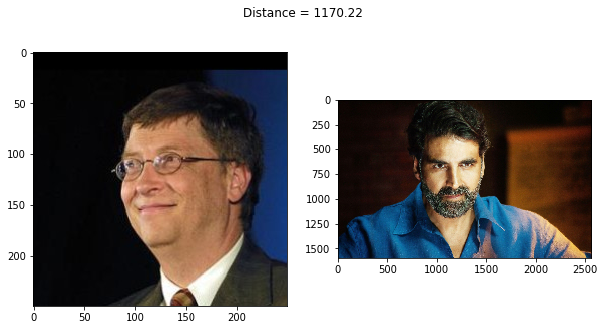

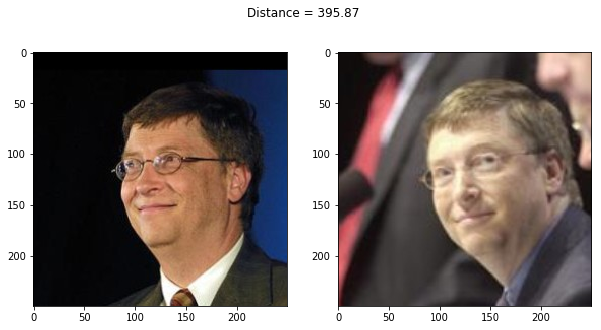

In [20]:
show_pair(1,100)
show_pair(1, 3)

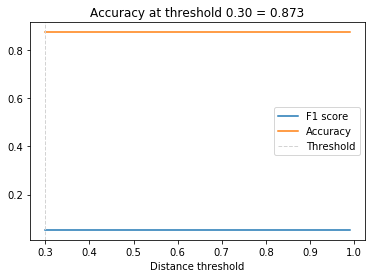

In [21]:
from sklearn.metrics import f1_score, accuracy_score

distances = []
identity = []

num = len(train_paths)
for i in range(num - 1):
    name_i = os.path.dirname(train_paths[i]).split("/")[-1]
    for j in range(1,num):
        distances.append(distance(embeddings[i], embeddings[j]))
        name_j = os.path.dirname(train_paths[j]).split("/")[-1]
        identity.append(1 if name_i == name_j else 0)

distances = np.array(distances)
identity = np.array(identity)

thresholds = np.arange(0.3, 1.0, 0.01)

f1_scores = [f1_score(identity, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identity, distances < t) for t in thresholds]

opt_idx = np.argmax(f1_scores)
# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]
# Accuracy at maximal F1 score
opt_acc = accuracy_score(identity, distances < opt_tau)

# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}');
plt.xlabel('Distance threshold')
plt.legend();

## FaceRecognition Using KNN or SVM

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
actual_labels = np.array([os.path.dirname(_).split("/")[-1] for _ in train_paths])
encoder.fit(actual_labels)
y = encoder.transform(actual_labels)
x_train, x_test, y_train, y_test = train_test_split(embeddings, y, train_size = 0.8, shuffle = True)

/home/admin/anaconda3/envs/rudra/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
knn = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
svc = LinearSVC()

knn.fit(x_train, y_train)
svc.fit(x_train, y_train)

pred_knn = knn.predict(x_test)
pred_svc = svc.predict(x_test)
acc_knn = accuracy_score(y_test, pred_knn)
acc_svc = accuracy_score(y_test, pred_knn)

print("knn accuracy ", acc_knn, "svm accuracy ", acc_svc)

knn accuracy  0.9642857142857143 svm accuracy  0.9642857142857143


In [13]:
def show_predictions(indexes):
    plt.figure(figsize=(16,16))
    
    for i, idx in enumerate(indexes[:16]):
        example_image = load_img(train_paths[idx])
        example_prediction = svc.predict([embeddings[idx]])
        example_identity = encoder.inverse_transform(example_prediction)[0]

        plt.subplot(4,4,i+1)
        plt.imshow(example_image)
        plt.title(f'Recognized as {example_identity}');

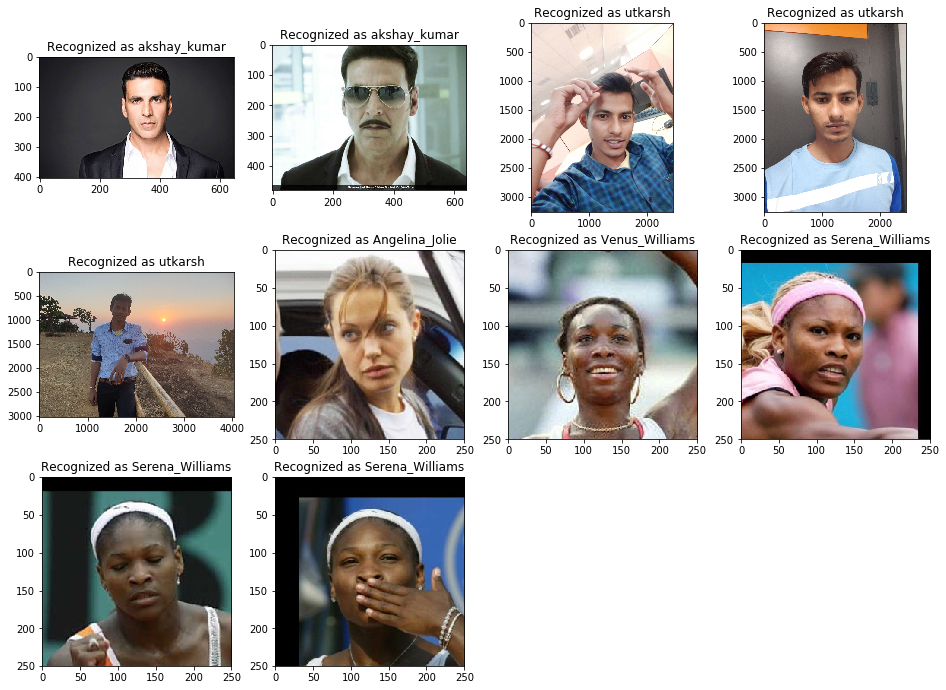

In [14]:
show_predictions(range(2,200, 20))

In [7]:
from sklearn.externals import joblib

In [13]:
joblib.dump(knn, "knn_mtcnn1.joblib")
joblib.dump(svc, "svc_mtcnn1.joblib")
joblib.dump(encoder, "encoder_mtcnn1.joblib")

['encoder_mtcnn1.joblib']

In [8]:
knn_saved = joblib.load("knn_mtcnn1.joblib")
svc_saved = joblib.load("svc_mtcnn1.joblib")
encoder_saved = joblib.load("encoder_mtcnn1.joblib")

In [18]:
facenet.save("custome_FR_Inceptionv1_512D_mtcnn.h5")

In [264]:
def show_predictions(indexes):
    plt.figure(figsize=(20,20))
    
    for i, idx in enumerate(indexes[:20]):
        example_image = load_img(train_paths[idx])
        example_prediction = knn_saved.predict([embeddings[idx]])
        example_identity = encoder.inverse_transform(example_prediction)[0]

        plt.subplot(5,5,i+1)
        plt.imshow(example_image)
        plt.title(f'Recognized as {example_identity}');

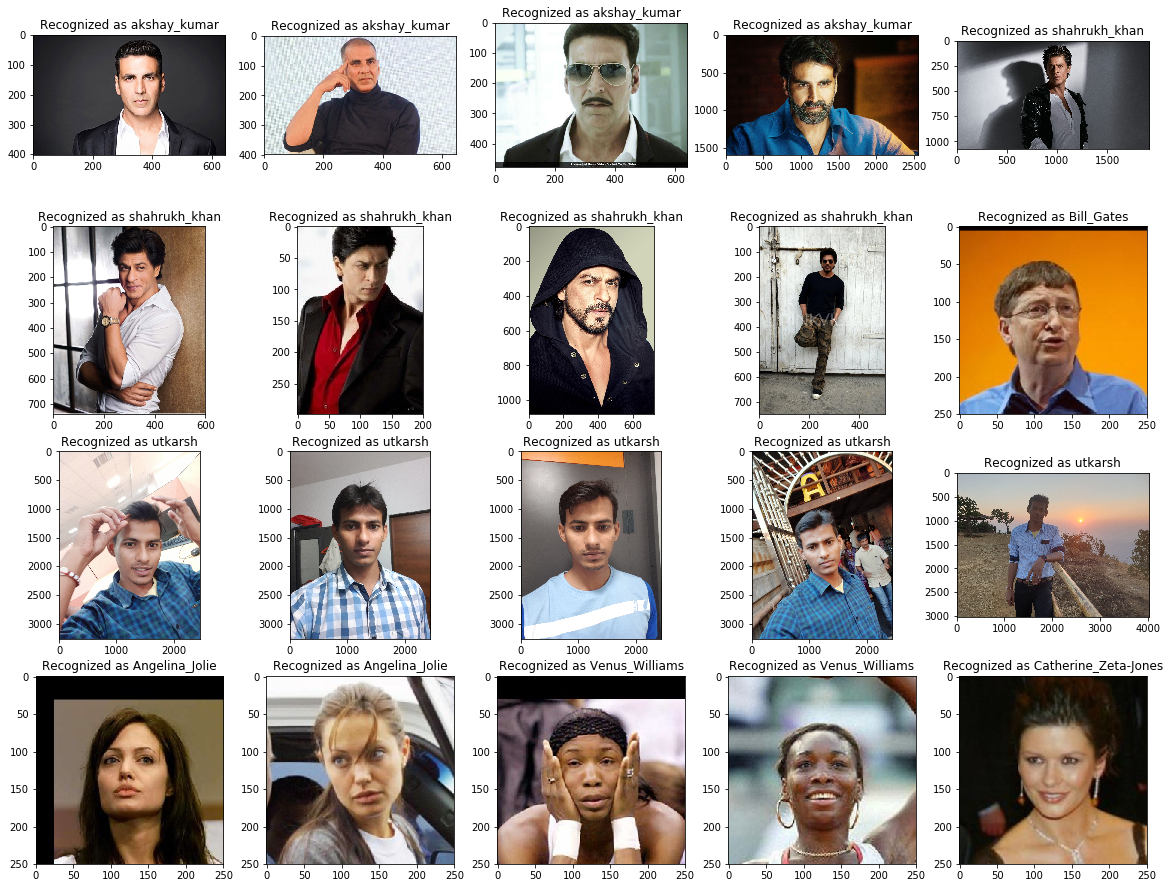

In [265]:
show_predictions(range(2,200, 10))

In [9]:
from align_mtcnn import AlignMTCNN
align_image_mtcnn = AlignMTCNN()
pnet, rnet, onet = align_image_mtcnn.get_session(0.1)
def show_prediction_on_new_files(dir_path):
    plt.figure(figsize=(16,16))
    test_paths = load_paths(dir_path)
    for i in range(len(test_paths)):
        img = load_img(test_paths[i])
        aligned_image = align_image_mtcnn.aligned(160, img, pnet, rnet, onet)[0]
        aligned_image = (aligned_image / 255.).astype(np.float32)
        emb = facenet.predict([np.expand_dims(aligned_image, axis = 0)])[0]
        pred = knn_saved.predict([emb])
        prediction = encoder_saved.inverse_transform(pred)
        plt.subplot(4,4,i+1)
        plt.imshow(img)
        plt.title(f"Predicted as {prediction}")

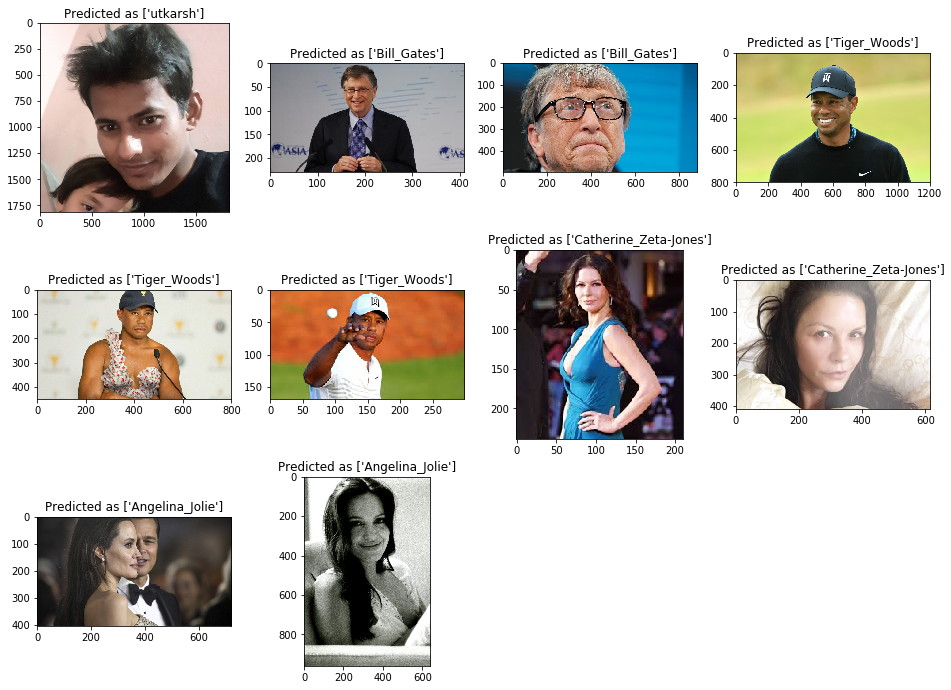

In [10]:
show_prediction_on_new_files("./data/test/")

In [1]:
import os


In [3]:
os.path.isdir("/image/rudra/")

True